In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the data:
import matplotlib.pyplot as plt
import seaborn as sns 

# Preprocessing the dataset:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split

# Classification algorithms:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Analysis of classificaiton algorithms:
from sklearn.metrics import accuracy_score

# Model Selection
from sklearn.model_selection import cross_val_score, StratifiedKFold,KFold

# Analysis of classificaiton algorithms:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Remove warnings:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
#Read the dataset and display

data = pd.read_csv(r'C:\Users\HP\Downloads\train.csv')
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


# Exploratory Data Analysis

In [3]:
#Check number of rows and columns of the dataset

data.shape

(13994, 30)

In [4]:
#display the columns of the data

data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [6]:
#type of each columns in the data

data.dtypes

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

player_id,name,gender,country,strong_foot,dedication_level,coaching,

age,ball_controlling_skills,

In [8]:
#display type of the data

type(data)

pandas.core.frame.DataFrame

In [9]:
# some basic statistical analysis about the data

data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [10]:
#dimensions of the data

data.ndim

2

In [11]:
#check unique values

data.nunique()

player_id                    13994
name                         13994
age                             39
gender                           2
country                        163
height                          31
weight                          88
ball_controlling_skills         89
body_reflexes                   84
body_balance                    86
jumping_skills                  74
penalties_conversion_rate       86
mental_strength                 83
goalkeeping_skills              65
defending_skills                78
passing_skills                  77
dribbling_skills                48
shot_accuracy                   79
body_strength_stamina           73
max_running_speed              166
strong_foot                      4
behaviour_rating                64
matches_played                  18
fitness_rating                  85
trophies_won                    10
dedication_level                 3
coaching                         4
years_of_experience             25
no_of_disqualificati

In [12]:
data['selection'].value_counts()

1    7802
0    6192
Name: selection, dtype: int64

In [13]:
#visualization of the data

sns.pairplot(train_data,hue='selection')

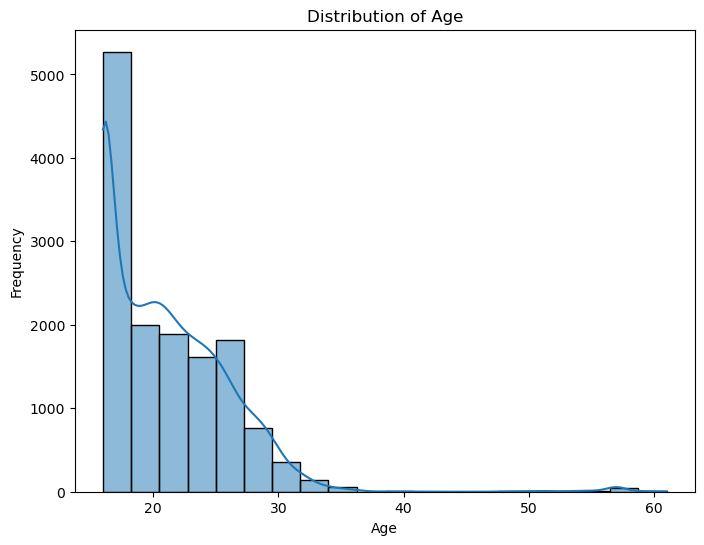

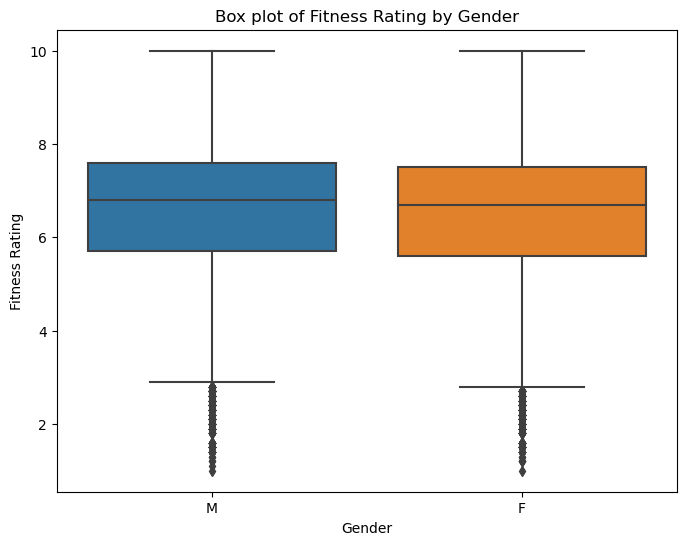

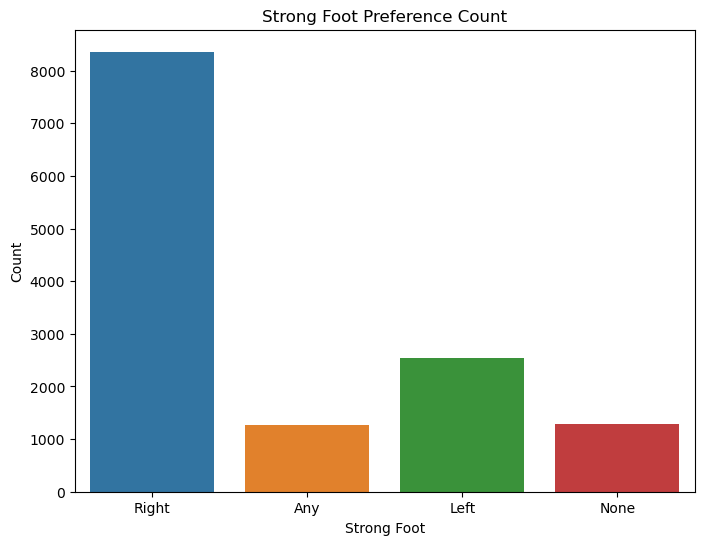

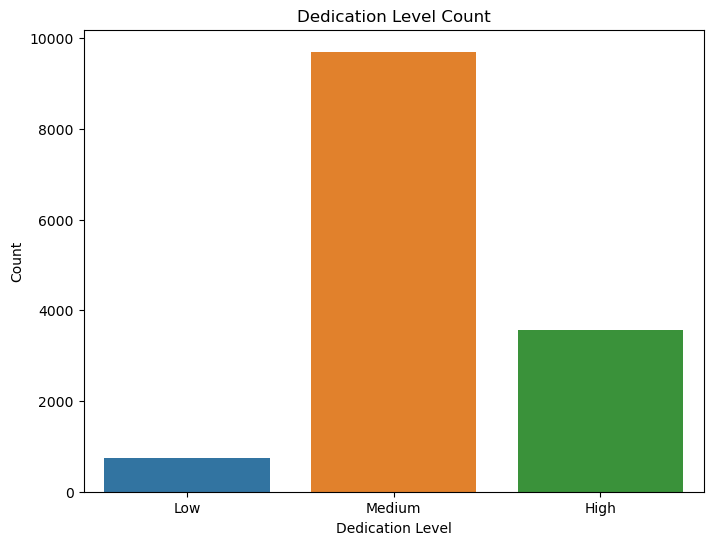

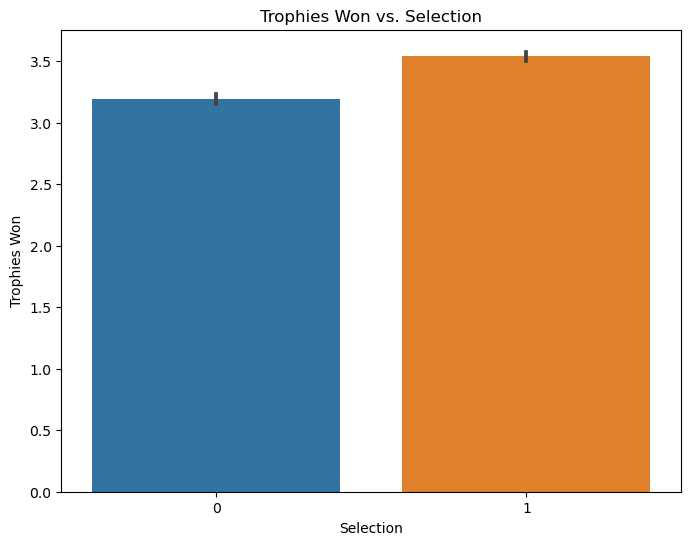

In [14]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot of Fitness Rating vs. Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='fitness_rating', data=data)
plt.title('Box plot of Fitness Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Fitness Rating')
plt.show()

# Bar plot of Strong Foot Preference
plt.figure(figsize=(8, 6))
sns.countplot(x='strong_foot', data=data)
plt.title('Strong Foot Preference Count')
plt.xlabel('Strong Foot')
plt.ylabel('Count')
plt.show()

# Bar plot of Dedication Level
plt.figure(figsize=(8, 6))
sns.countplot(x='dedication_level', data=data, order=['Low', 'Medium', 'High'])
plt.title('Dedication Level Count')
plt.xlabel('Dedication Level')
plt.ylabel('Count')
plt.show()

# Bar plot of Trophies Won vs. Selection
plt.figure(figsize=(8, 6))
sns.barplot(x='selection', y='trophies_won', data=data)
plt.title('Trophies Won vs. Selection')
plt.xlabel('Selection')
plt.ylabel('Trophies Won')
plt.show()

strong foot preference count is high for right and low for any.
dedication level count is very high for medium and very less for low.

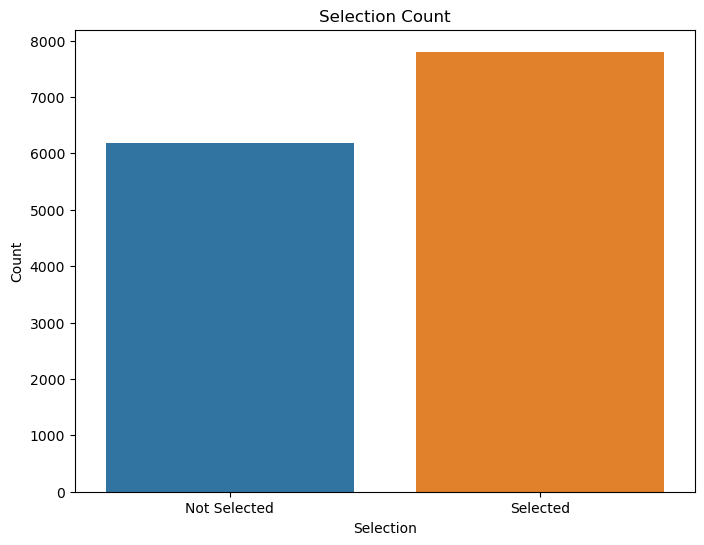

In [15]:
# Bar plot of Selection
plt.figure(figsize=(8, 6))
sns.countplot(x='selection', data=data)
plt.title('Selection Count')
plt.xlabel('Selection')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Selected', 'Selected'])
plt.show()


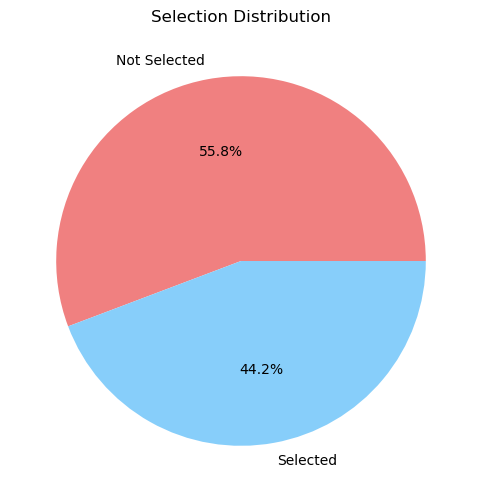

In [16]:
# Pie chart of Selection
selection_counts = data['selection'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(selection_counts, labels=['Not Selected', 'Selected'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Selection Distribution')
plt.show()

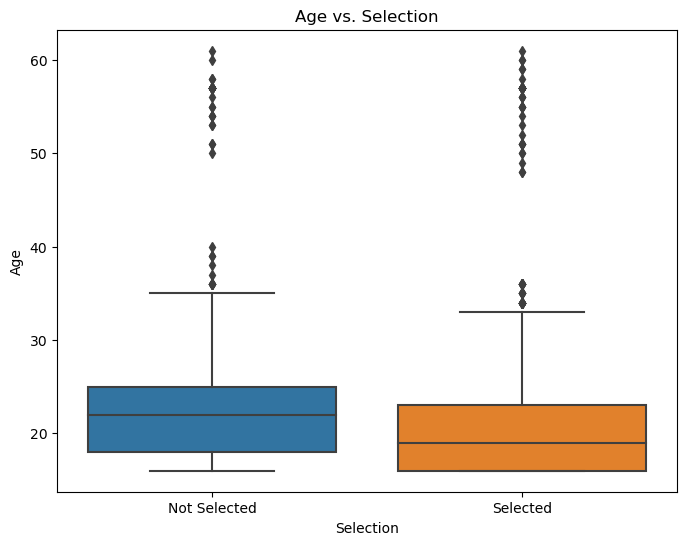

In [17]:
# Box plot of Age vs. Selection
plt.figure(figsize=(8, 6))
sns.boxplot(x='selection', y='age', data=data)
plt.title('Age vs. Selection')
plt.xlabel('Selection')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Selected', 'Selected'])
plt.show()

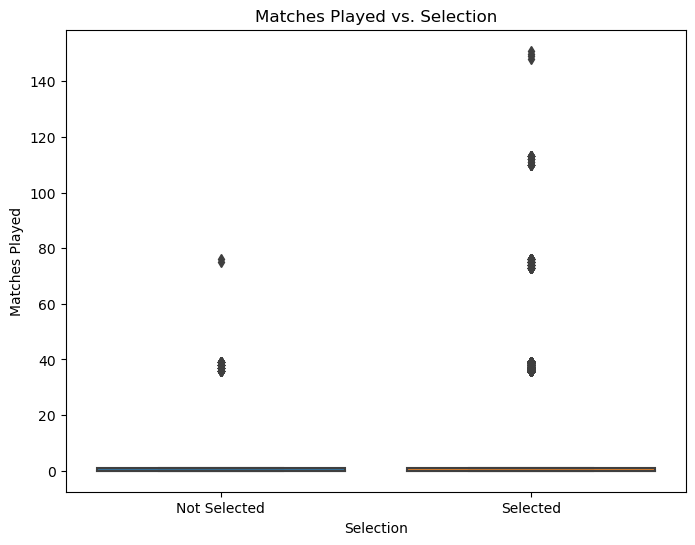

In [18]:
# Box plot of Matches Played vs. Selection
plt.figure(figsize=(8, 6))
sns.boxplot(x='selection', y='matches_played', data=data)
plt.title('Matches Played vs. Selection')
plt.xlabel('Selection')
plt.ylabel('Matches Played')
plt.xticks([0, 1], ['Not Selected', 'Selected'])
plt.show()

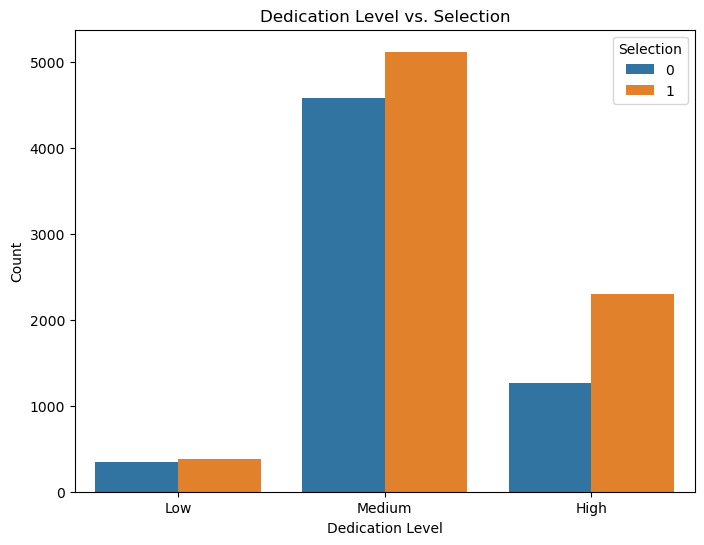

In [19]:
# Bar plot of Dedication Level vs. Selection
plt.figure(figsize=(8, 6))
sns.countplot(x='dedication_level', hue='selection', data=data, order=['Low', 'Medium', 'High'])
plt.title('Dedication Level vs. Selection')
plt.xlabel('Dedication Level')
plt.ylabel('Count')
plt.legend(title='Selection')
plt.show()

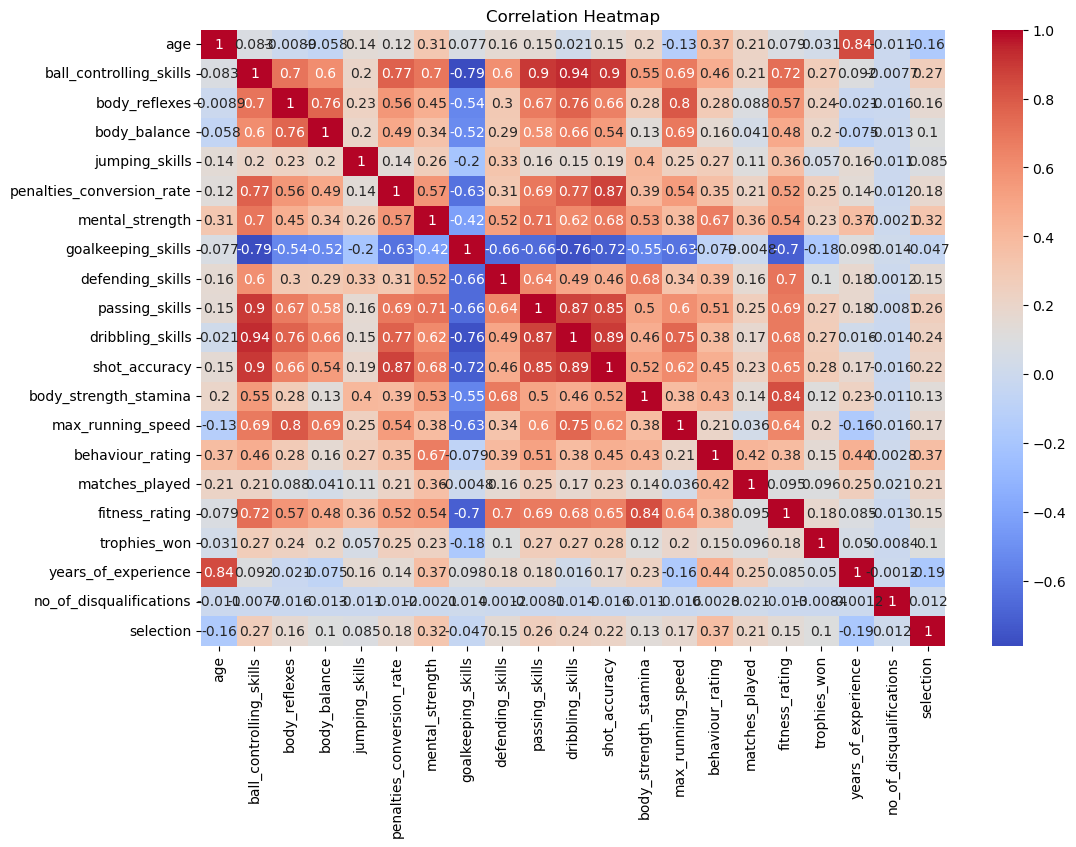

In [20]:
# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
sns.pairplot(train_data)

# Perform data cleaning and outlier detection:

In [22]:
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

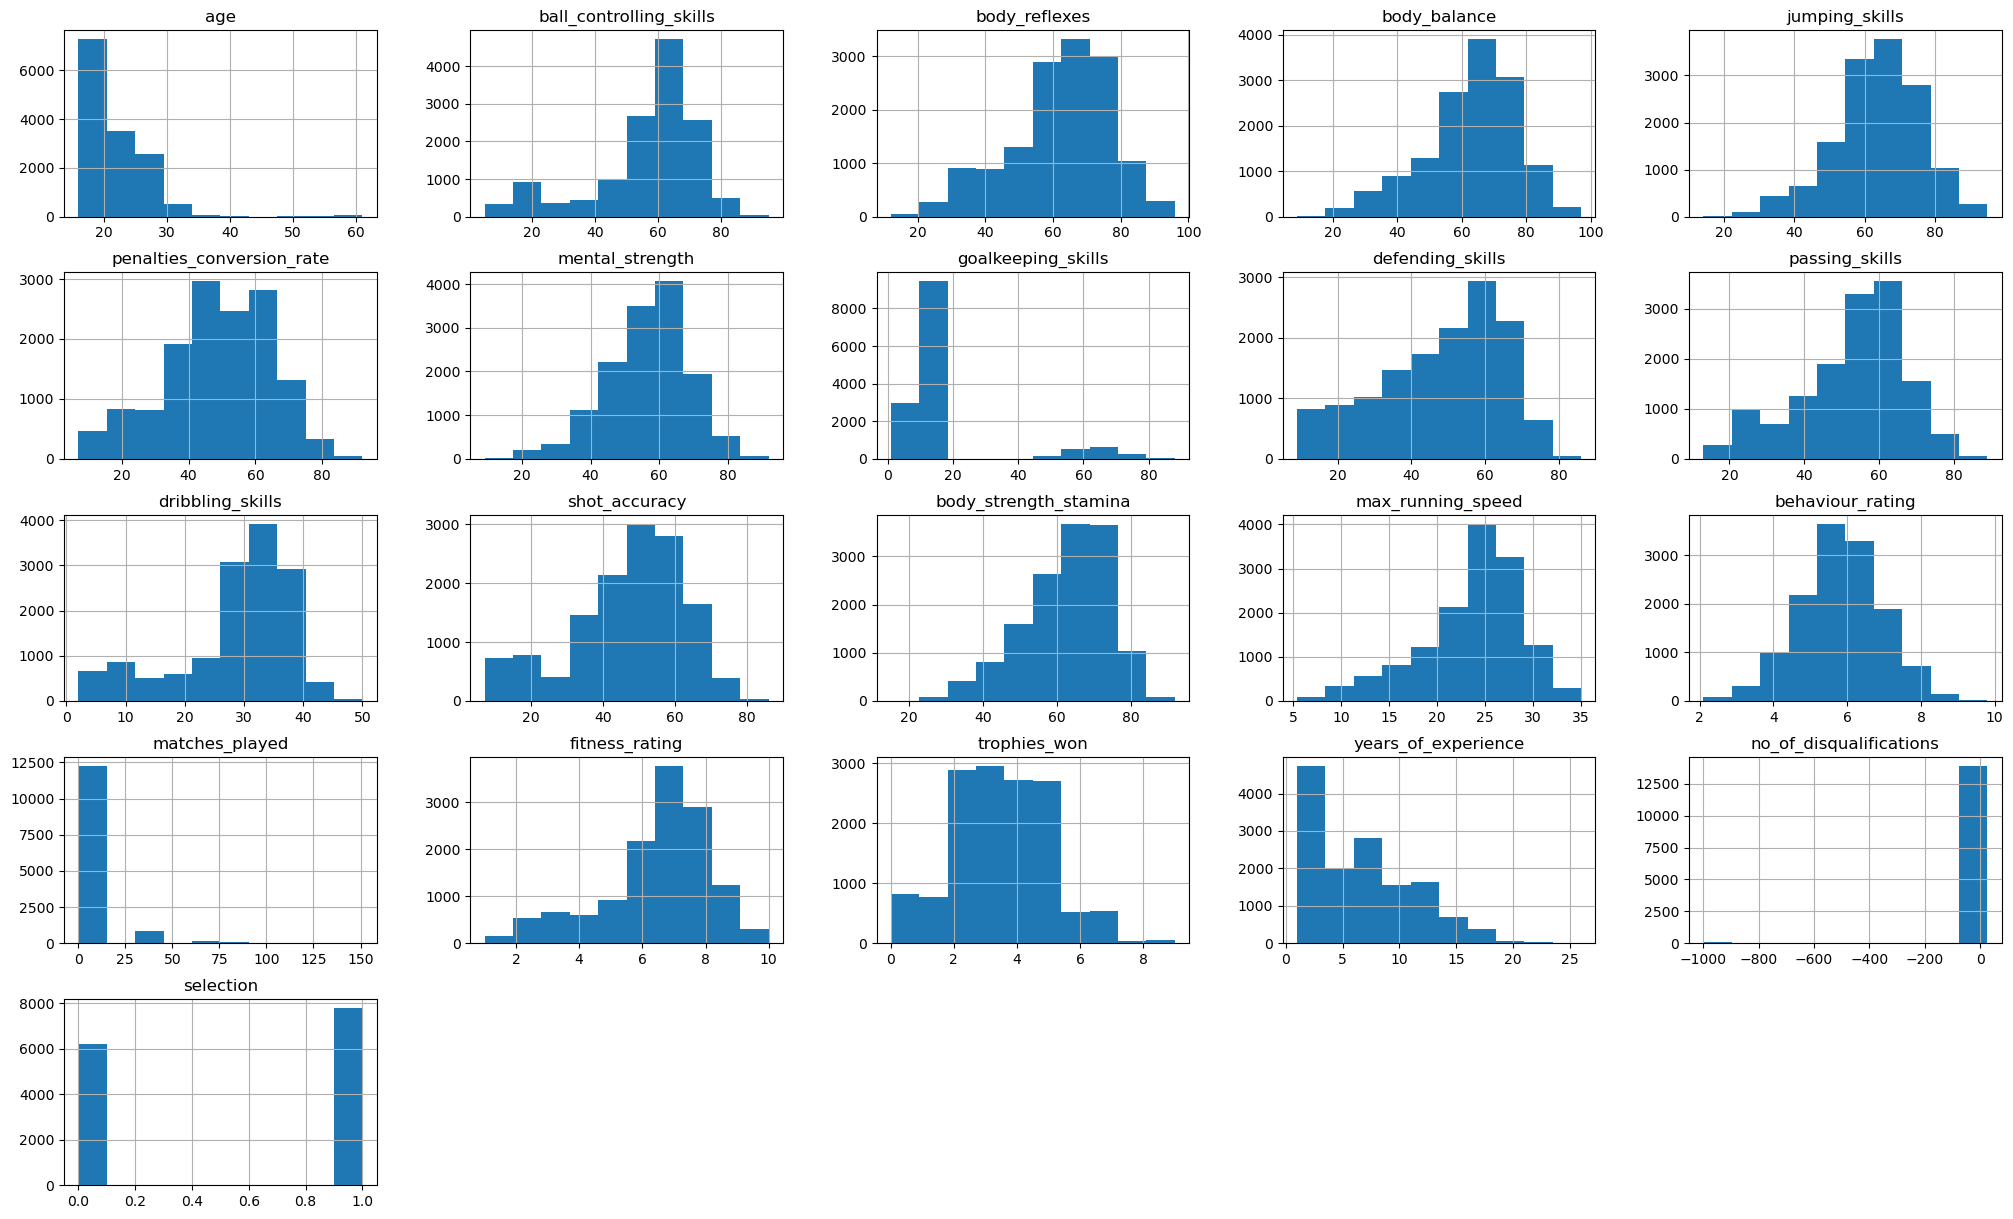

In [24]:
#plot graphs for float and int data types

freqgraph = data.select_dtypes(include=['float' , 'int'])
freqgraph.hist(figsize=(25,15))
plt.show()

In [25]:
# Convert 'height' and 'weight' columns to numeric:

data["height"] = data["height"].apply(lambda x: int(x.split("'")[0]) * 12 + int(x.split("'")[1]))
data["weight"] = data["weight"].str.extract("(\d+)").astype(float)

In [26]:
# Filling the missing values in the "Numerical Features" of the dataset with the median value of  each respective column:

numerical_features = [
    'weight','ball_controlling_skills', 'jumping_skills', 'penalties_conversion_rate',
    'mental_strength', 'shot_accuracy', 'behaviour_rating', 'matches_played',
    'fitness_rating', 'years_of_experience'
]

for col in numerical_features:
    data[col] = data[col].fillna(data[col].median())

In [27]:
# Filling the missing values in the 'Categorical Features' of the dataset with the  mode value of each respective column:

categorical_features = ['gender','strong_foot', 'coaching']

for col in categorical_features:
    data[col] = data[col].fillna(data[col].mode()[0])

In [28]:
# Again check for count of null values in each column after filling the missing values:

data.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_31508\2975098519.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


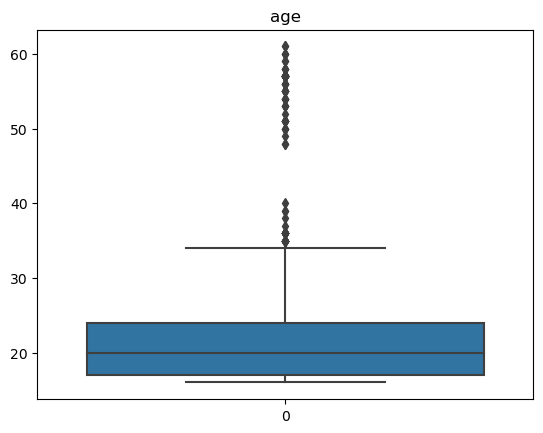

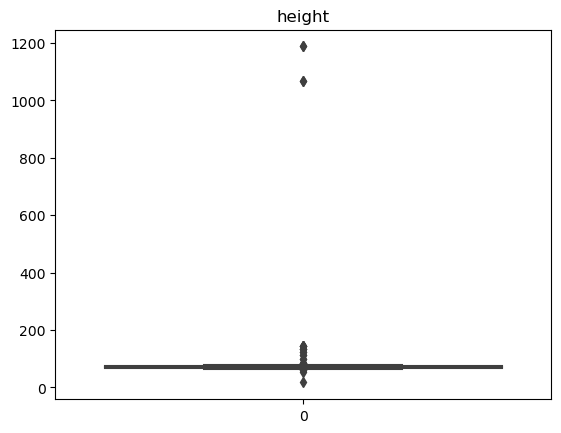

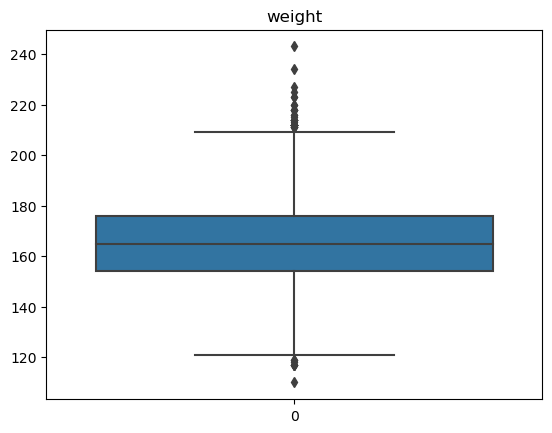

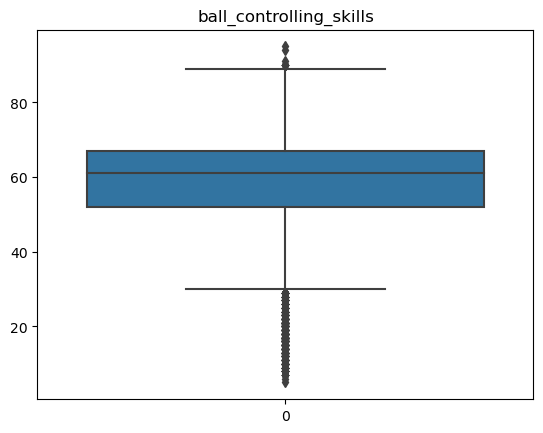

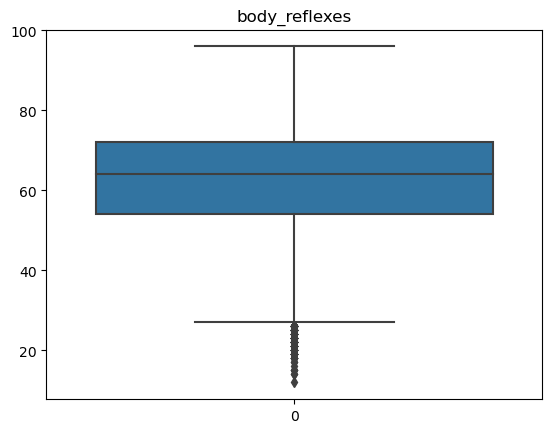

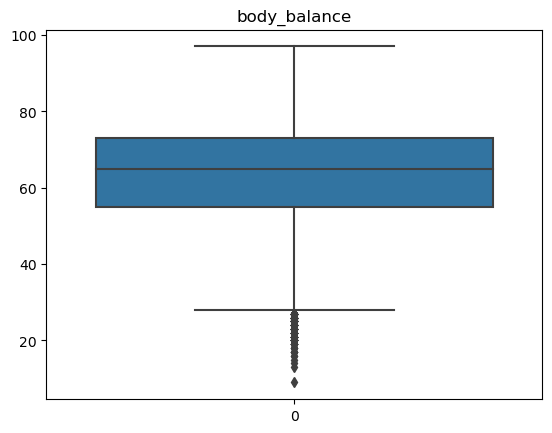

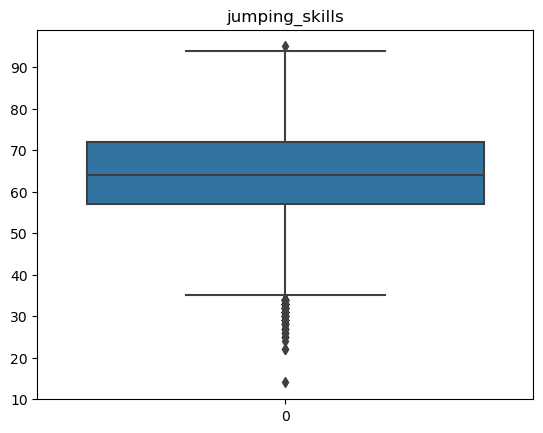

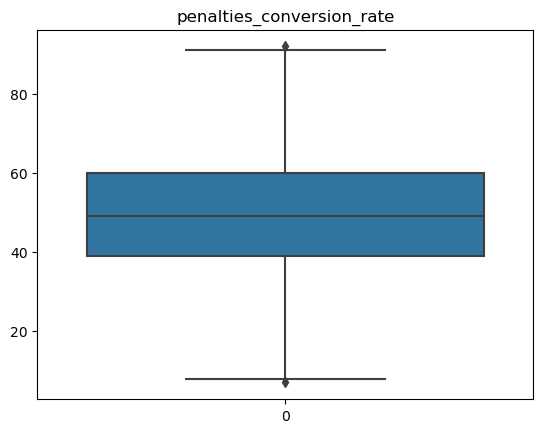

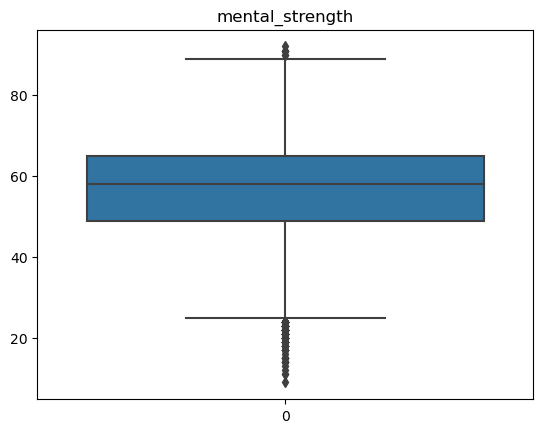

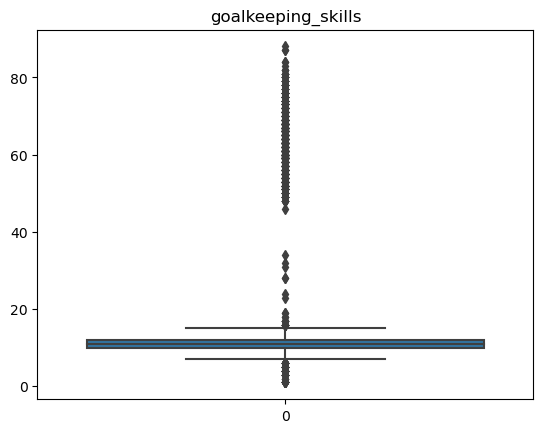

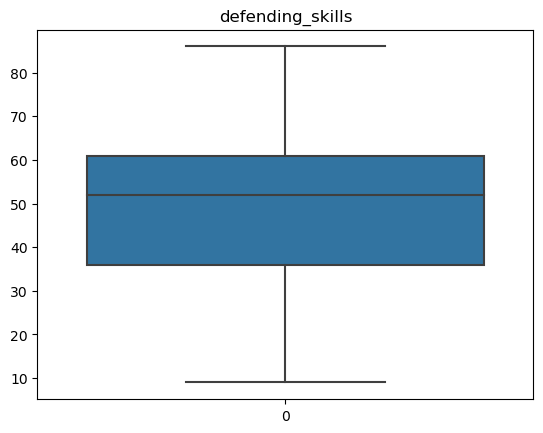

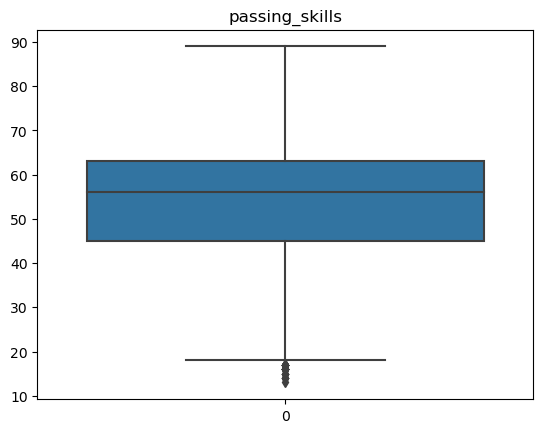

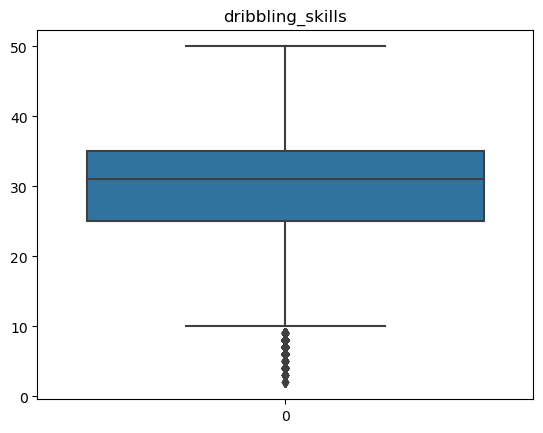

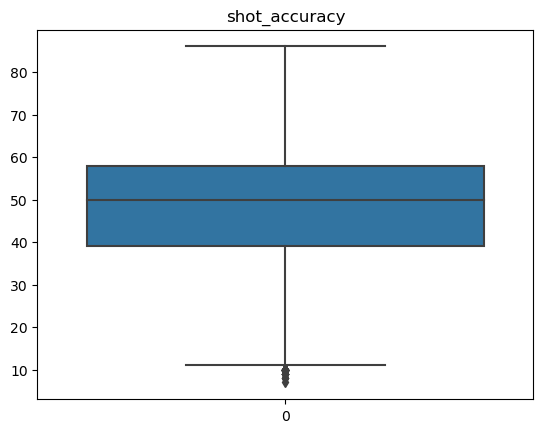

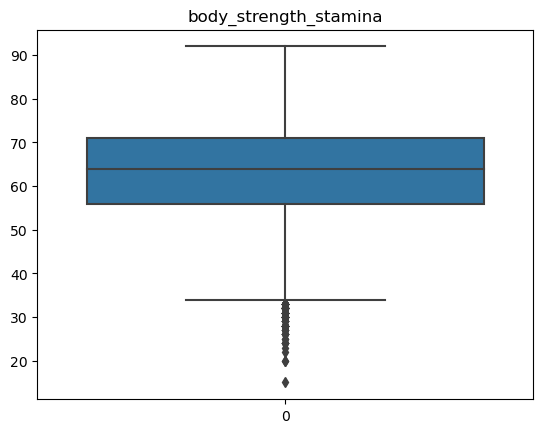

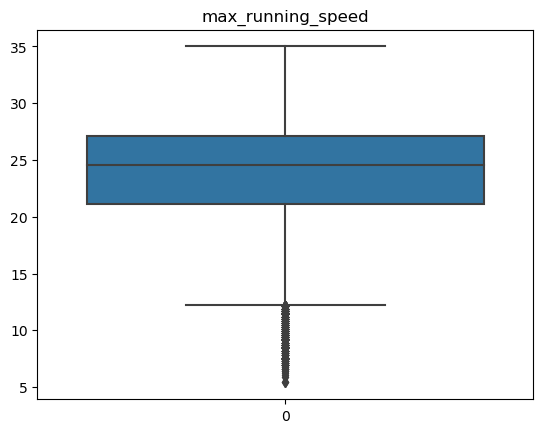

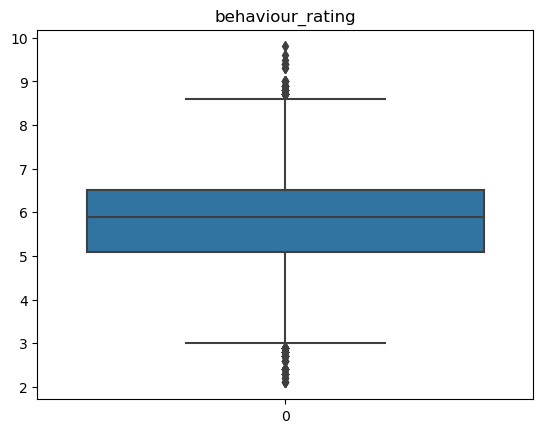

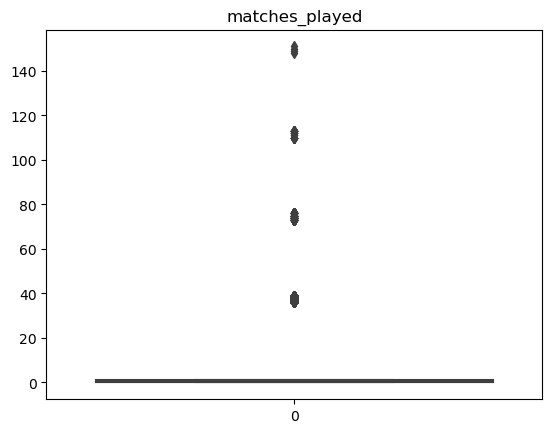

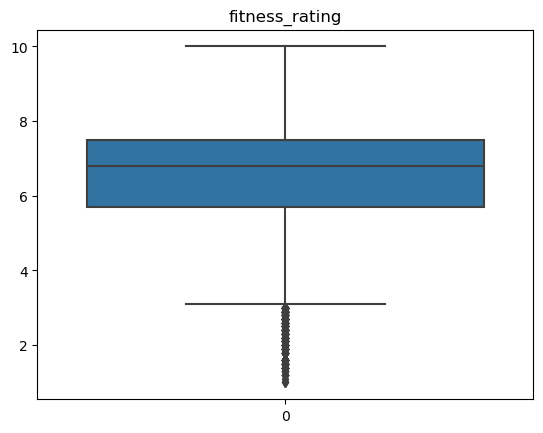

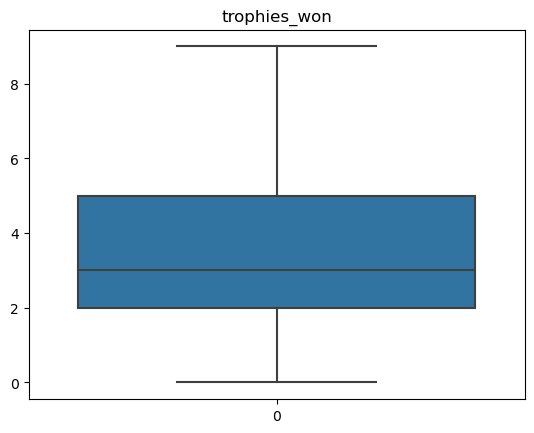

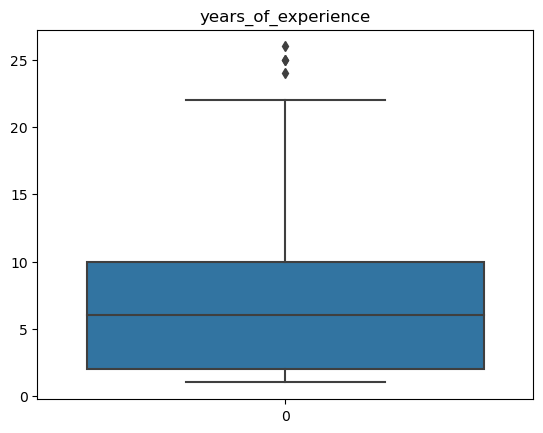

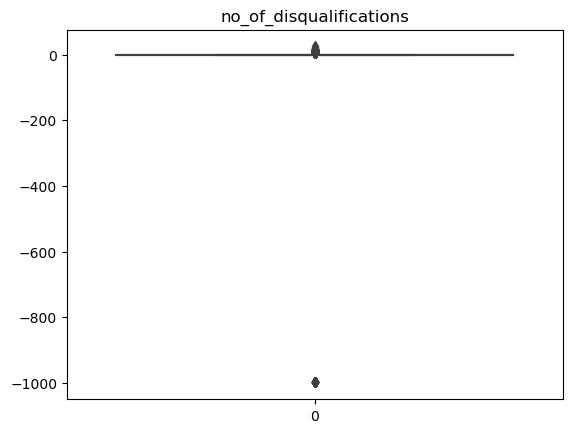

In [29]:
#create a boxplot to display outlier


num_cols = ['age','height','weight','ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed','behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won','years_of_experience', 'no_of_disqualifications',]
for i in num_cols:
    plt.figure()
    sns.boxplot(data[i])
    plt.title(i)

'age','height','weight','ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills','penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed','behaviour_rating',
       'matches_played', 'fitness_rating', 'years_of_experience', 'no_of_disqualifications' these columns have outliers
       

In [30]:
#remove unwanted columns from the data and store it in another variable and display

data1 = data.drop(['player_id', 'name'],axis=1)
data1.head()

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,M,Ukraine,74,176.0,77.0,58.0,47.0,59.0,41.0,...,Right,7.7,0.0,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,18,M,Russia,70,148.0,54.0,69.0,70.0,62.0,53.0,...,Any,5.3,0.0,6.8,3.0,Medium,Source,3.0,0.0,0
2,16,F,Spain,74,172.0,34.0,43.0,45.0,69.0,49.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,27,M,Chile,71,165.0,79.0,73.0,76.0,86.0,81.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,19,F,Argentina,68,158.0,47.0,61.0,74.0,57.0,49.0,...,Right,5.9,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13994 non-null  int64  
 1   gender                     13994 non-null  object 
 2   country                    13994 non-null  object 
 3   height                     13994 non-null  int64  
 4   weight                     13994 non-null  float64
 5   ball_controlling_skills    13994 non-null  float64
 6   body_reflexes              13994 non-null  float64
 7   body_balance               13994 non-null  float64
 8   jumping_skills             13994 non-null  float64
 9   penalties_conversion_rate  13994 non-null  float64
 10  mental_strength            13994 non-null  float64
 11  goalkeeping_skills         13994 non-null  float64
 12  defending_skills           13994 non-null  float64
 13  passing_skills             13994 non-null  flo

# Encoding

In [32]:
# Check the distribution of the categorical variables:
categorical_vars = ['gender','country','strong_foot', 'dedication_level', 'coaching']

# Calculate the value counts for each column
print (data[categorical_vars].value_counts())

gender  country      strong_foot  dedication_level  coaching   
M       England      Right        Medium            Academy        179
F       England      Right        Medium            Academy        178
        Germany      Right        Medium            Academy        171
M       Germany      Right        Medium            Academy        150
        Spain        Right        Medium            Academy        141
                                                                  ... 
F       Switzerland  None         Low               Academy          1
                     Left         Medium            Unknown          1
                     Any          Medium            Unknown          1
                                                    Talent Hunt      1
M       Zimbabwe     Right        Medium            Source           1
Length: 3047, dtype: int64


In [33]:
#perform label encoding

label_cols = ['gender','country','strong_foot', 'dedication_level', 'coaching']
label_encoders = {}  # To store encoders for each column

for col in label_cols:
    le = LabelEncoder()
    encoded = le.fit_transform(data1[col])
    data1[col] = encoded
    label_encoders[col] = le

In [34]:
#display after encoding
data1.head()

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,1,153,74,176.0,77.0,58.0,47.0,59.0,41.0,...,3,7.7,0.0,8.1,2.0,0,2,8.0,0.0,1
1,18,1,124,70,148.0,54.0,69.0,70.0,62.0,53.0,...,0,5.3,0.0,6.8,3.0,2,1,3.0,0.0,0
2,16,0,135,74,172.0,34.0,43.0,45.0,69.0,49.0,...,1,4.7,0.0,6.6,5.0,1,0,2.0,0.0,1
3,27,1,28,71,165.0,79.0,73.0,76.0,86.0,81.0,...,3,8.6,113.0,8.6,6.0,2,0,13.0,16.0,1
4,19,0,5,68,158.0,47.0,61.0,74.0,57.0,49.0,...,3,5.9,0.0,5.7,5.0,2,0,4.0,0.0,0


# Scaling

In [35]:
from sklearn.preprocessing import RobustScaler

# List of numerical columns to be scaled
cols_to_scale = ['age','height','weight','ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed','behaviour_rating',
       'matches_played', 'fitness_rating','years_of_experience', 'no_of_disqualifications']
robust_scaling = {}  # To store scaling for each column

for col in cols_to_scale:
    rs = RobustScaler()
    scaled_values = rs.fit_transform(data1[[col]])  # Notice the change here, using rs.fit_transform
    data1[col] = scaled_values
    robust_scaling[col] = rs

In [39]:
data1.describe()

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,...,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000
mean,0.162263,0.501000,75.011219,0.147617,0.027408,-0.320652,-0.114760,-0.124815,-0.025821,-0.023963,...,2.274260,-0.052870,3.722452,-0.208292,0.129698,1.439260,0.656853,0.053711,-4.740675,0.557525
std,0.737531,0.500017,46.840850,4.547590,0.691744,1.103935,0.829554,0.789091,0.795232,0.750029,...,1.051568,0.762828,13.282133,0.925699,0.569717,0.868749,1.045667,0.553526,72.023656,0.496698
min,-0.571429,0.000000,0.000000,-13.500000,-2.500000,-3.733333,-2.888889,-3.111111,-3.333333,-2.000000,...,0.000000,-2.714286,0.000000,-3.222222,-1.000000,0.000000,0.000000,-0.625000,-999.000000,0.000000
25%,-0.428571,0.000000,37.000000,-0.500000,-0.500000,-0.600000,-0.555556,-0.555556,-0.466667,-0.476190,...,1.000000,-0.571429,0.000000,-0.611111,-0.333333,0.000000,0.000000,-0.500000,0.000000,0.000000
50%,0.000000,1.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,0.571429,1.000000,122.000000,0.500000,0.500000,0.400000,0.444444,0.444444,0.533333,0.523810,...,3.000000,0.428571,1.000000,0.388889,0.666667,2.000000,1.000000,0.500000,0.000000,1.000000
max,5.857143,1.000000,162.000000,279.250000,3.545455,2.266667,1.777778,1.777778,2.066667,2.047619,...,3.000000,2.785714,151.000000,1.777778,2.000000,2.000000,3.000000,2.500000,25.000000,1.000000


# Model creation

In [36]:
# Separate the feature:
X = data1.drop(['selection'], axis=1) 
y = data1['selection']

Train and Evaluate the model by applying Classification Algorithms:

In [40]:
#Split the data into training and testing sets


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

# # Logistic Regression Classifier

In [41]:
model1 = LogisticRegression()
model1.fit(X_train , y_train) 
y_pred_lr = model1.predict(X_test) 

In [42]:
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('precision = ',precision_score(y_test,y_pred_lr, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_lr, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_lr, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_lr))

Accuracy =  0.77491961414791
precision =  0.7747773980994767
Recall =  0.7708627355043228
f1 score = 0.7720323364329396
confusion_matrix =
 [[ 927  359]
 [ 271 1242]]


# # Random Forest Classifier

In [43]:
model2 = RandomForestClassifier(n_estimators = 10,max_depth = 20,criterion = 'entropy',min_samples_split = 3)
model2.fit(X_train, y_train)
y_pred_rf = model2.predict(X_test)

In [44]:
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))
print('precision = ',precision_score(y_test,y_pred_rf, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_rf, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_rf, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_rf))

Accuracy =  0.8420864594498035
precision =  0.841193864683326
Recall =  0.8406909428807258
f1 score = 0.8409266478768926
confusion_matrix =
 [[1059  227]
 [ 215 1298]]


In [ ]:
# Random Forest Classifier

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],                # Maximum depth of each tree
    'min_samples_split': [2, 3, 4],                # Minimum number of samples required to split an internal node
    'criterion': ['gini', 'entropy']               # Splitting criterion
}

# Initialize the Random Forest Classifier model
model1 = RandomForestClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(model1, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model1 = grid_search.best_estimator_
y_pred_rf = best_model1.predict(X_test)


print('Accuracy = ',accuracy_score(y_test,y_pred_rf))
print('precision = ',precision_score(y_test,y_pred_rf, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_rf, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_rf, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_rf))

# # Decision Tree Classifier

In [45]:
model3 = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)
model3.fit(X_train, y_train)
y_pred_dt = model3.predict(X_test)

In [46]:
print('Accuracy = ',accuracy_score(y_test,y_pred_dt))
print('precision = ',precision_score(y_test,y_pred_dt, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_dt, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_dt, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_dt))

Accuracy =  0.7877813504823151
precision =  0.7918501592577205
Recall =  0.7924429439415167
f1 score = 0.7877715712454877
confusion_matrix =
 [[1093  193]
 [ 401 1112]]


# Support Vector Machines (SVM) Classifier

In [47]:
model4 = SVC(kernel='linear', C=1.0, gamma='scale')
model4.fit(X_train, y_train)
y_pred_svm = model4.predict(X_test)

In [48]:
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))
print('precision = ',precision_score(y_test,y_pred_svm, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_svm, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_svm, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_svm))

Accuracy =  0.7774205073240443
precision =  0.7769347204361328
Recall =  0.7738176858105851
f1 score = 0.7748338444768033
confusion_matrix =
 [[ 938  348]
 [ 275 1238]]


# k-Nearest Neighbors (kNN) Classifier 

In [49]:
# Initialize the list to store accuracy scores:

metric = []
neighbors = np.arange(3, 15)  # Set the desired range here

for k in neighbors:
    model5 = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    model5.fit(X_train,y_train)
    y_pred_knn = model5.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

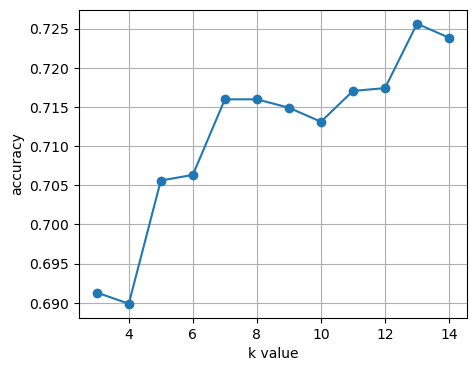

In [50]:
# Plot the number of neighbors (k value) and the corresponding accuracy metric:

plt.figure(figsize=(5,4))
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [51]:
model5 = KNeighborsClassifier(n_neighbors = 13, metric = 'minkowski',p=2)
model5.fit(X_train,y_train)   
y_pred_knn = model5.predict(X_test)   

In [52]:
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_knn,average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_knn))

Accuracy =  0.7256162915326902
precision =  0.725168668621331
Recall =  0.7202413196568054
f1 score = 0.721283095194876
confusion_matrix =
 [[ 841  445]
 [ 323 1190]]


In [53]:
print('Accuracy logisticRegression= ',accuracy_score(y_test,y_pred_lr))
print('Accuracy Random Forest = ',accuracy_score(y_test,y_pred_rf))
print('Accuracy Decission Tree= ',accuracy_score(y_test,y_pred_dt))
print('Accuracy SVM= ',accuracy_score(y_test,y_pred_svm))
print('Accuracy kNN= ',accuracy_score(y_test,y_pred_knn))


Accuracy logisticRegression=  0.77491961414791
Accuracy Random Forest =  0.8420864594498035
Accuracy Decission Tree=  0.7877813504823151
Accuracy SVM=  0.7774205073240443
Accuracy kNN=  0.7256162915326902


In [54]:
accuracies = {
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'kNN': accuracy_score(y_test, y_pred_knn),
    'Logistic Regression': accuracy_score(y_test, y_pred_lr)
}

max_accuracy = max(accuracies.values())

# Find the best models with the maximum accuracy
best_models = [model for model, accuracy in accuracies.items() if accuracy == max_accuracy]

# Print the best models
print("Best Model:")
for model in best_models:
    print(model)

print('Max Accuracy:', max_accuracy)

Best Model:
Random Forest
Max Accuracy: 0.8420864594498035
